**Jiayang's Part**

**Questions:**
```
1.What nonprofits have received grants and where are they based (geo?
```
    From the data, we can see that anonymous individuals has received 10 grants(not very meaningful), followed by Holy Name Church, NNACP, and PFHC that received two grants. Rest of the nonprofits all received only one grant. And, most of the non-profits that receives grants are in boston area (Almost triple amount of the second one). Followed by Cambridge, Roxbury, Worcester, etc.
```
2.What recipients and Who is giving to nonprofits with recipient subject codes or population served codes corresponding to African and Latin American descent?
```
    Dataframe with the name of recipient is stored in unique_recipients_serving_specific_populations. And the one for grantmaker is stored in unique_grantmaker_serving_specific_populations. From the data of the top 10 recipient/grantmaker, it seems like all of the recipient/grantmaker is only receiving/making one grant.
```
    
```

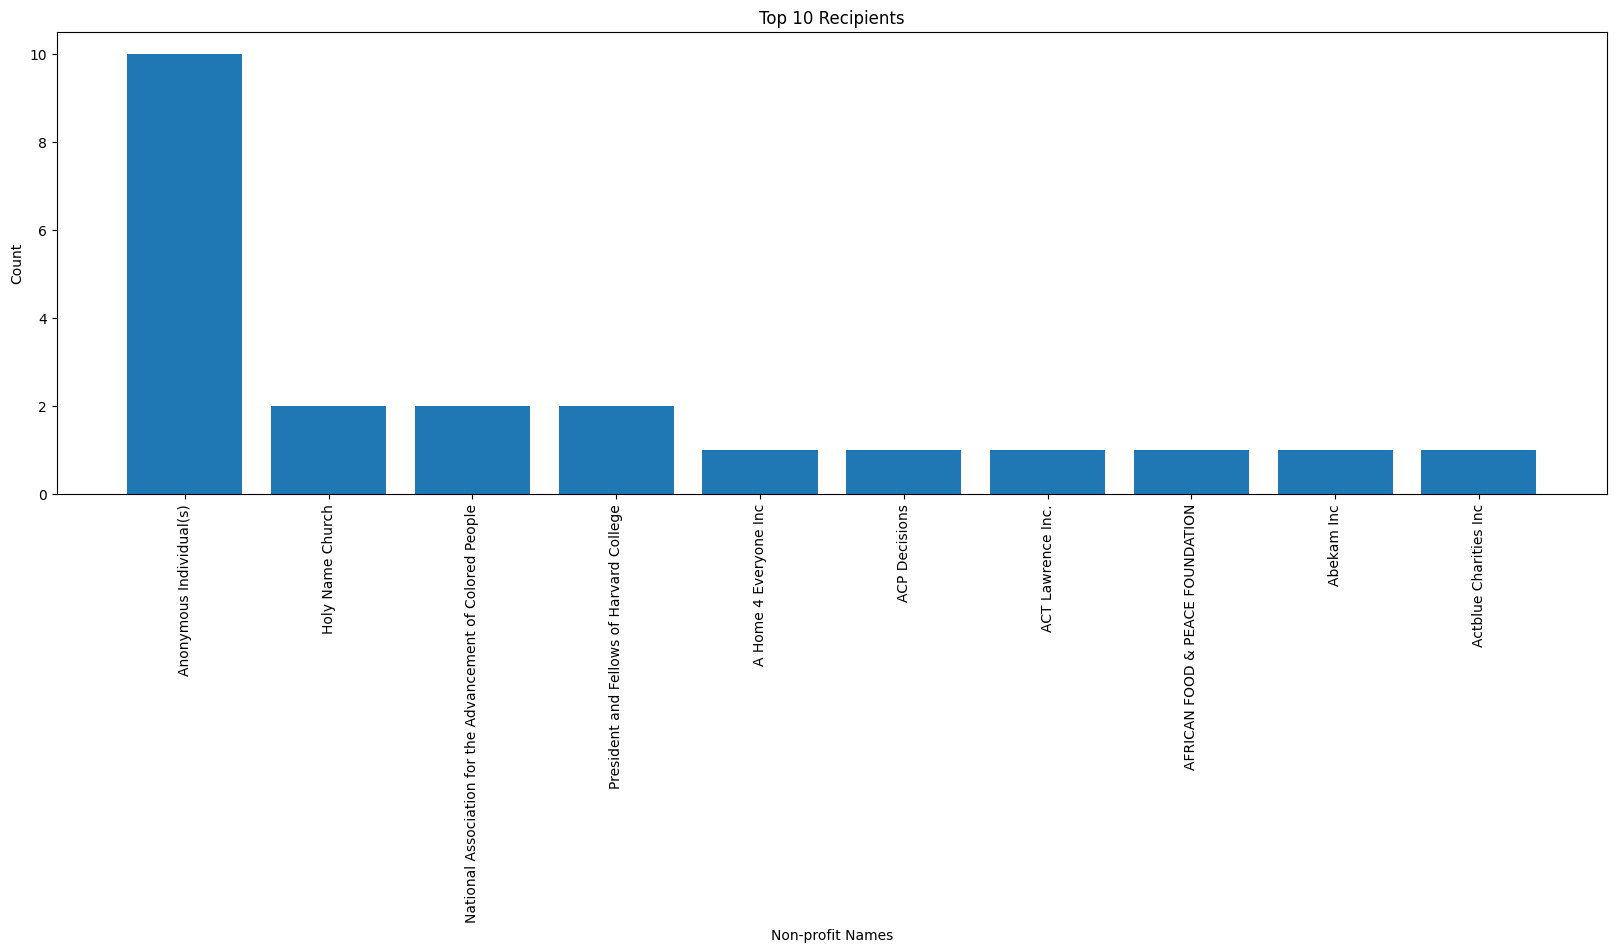

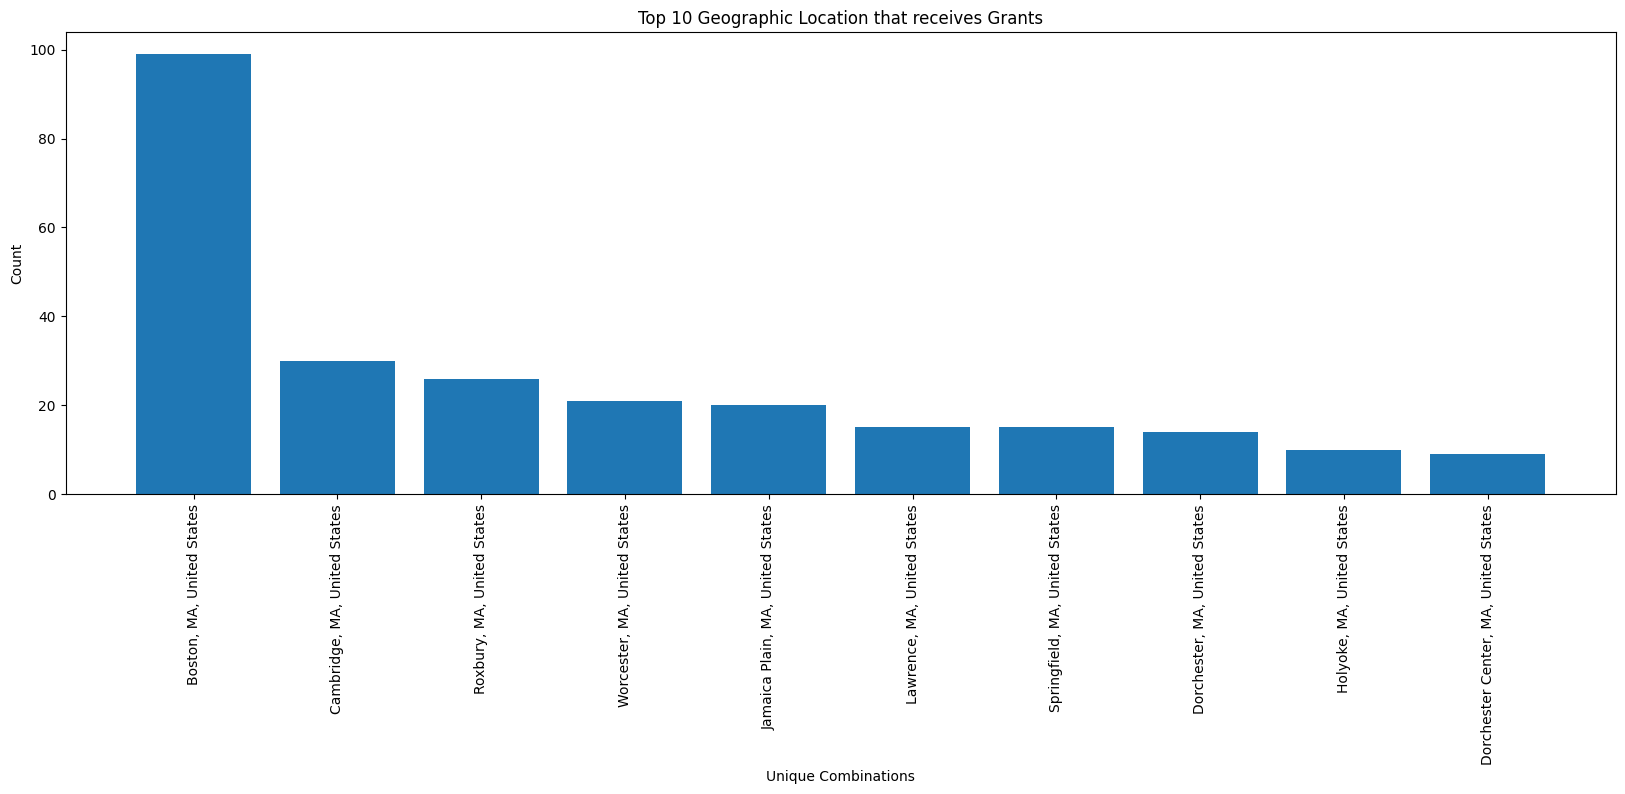

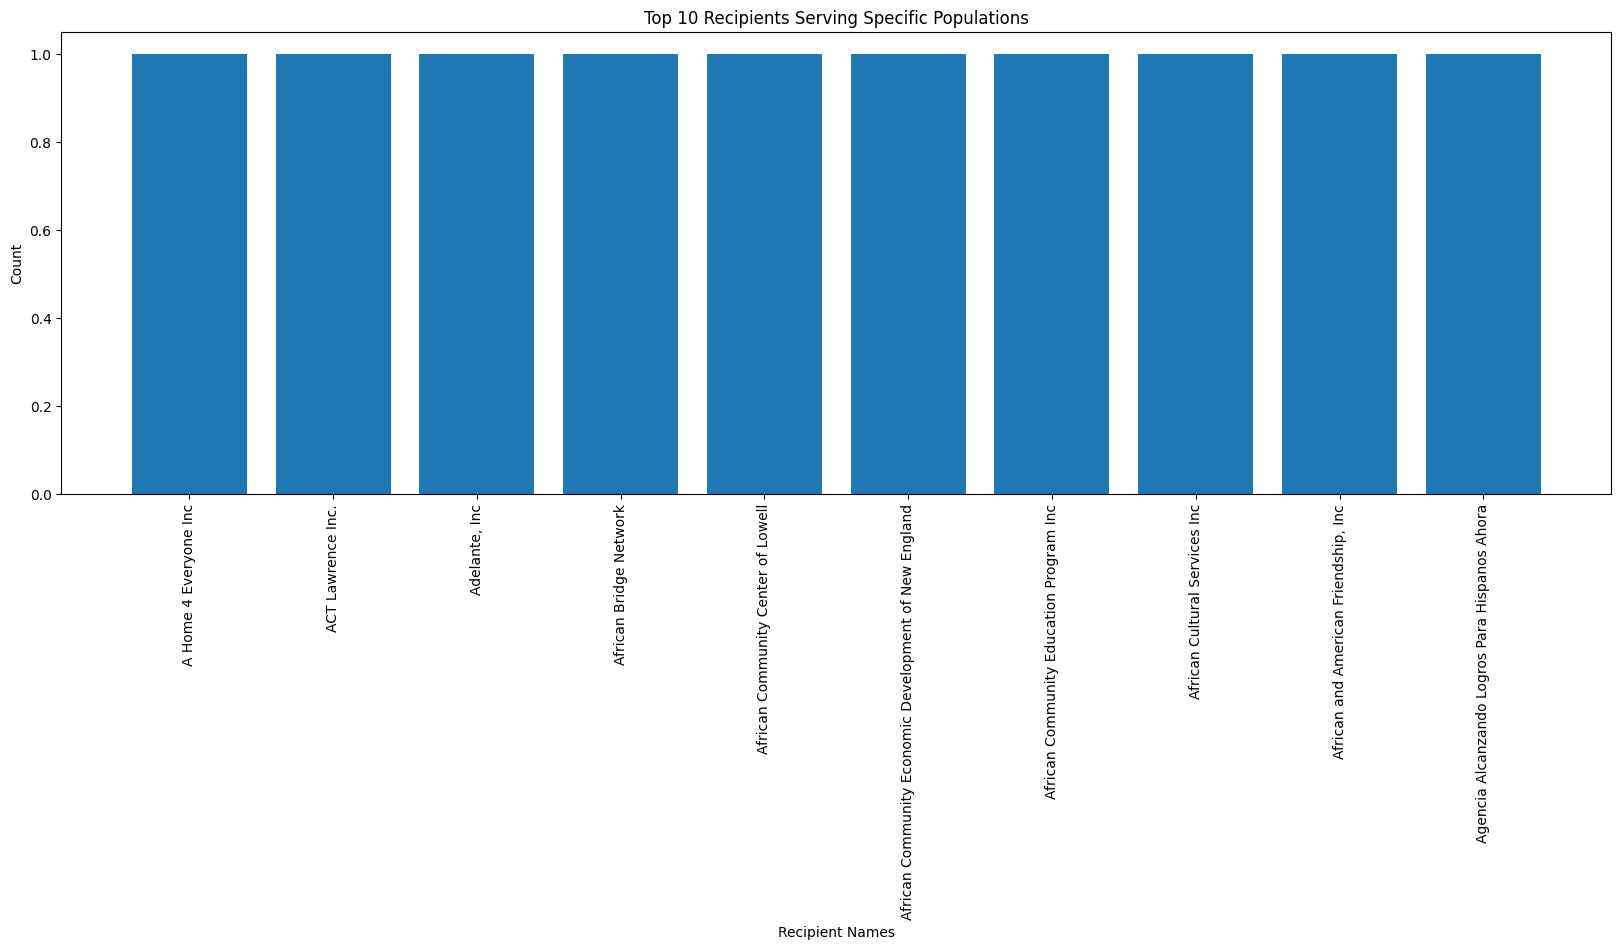

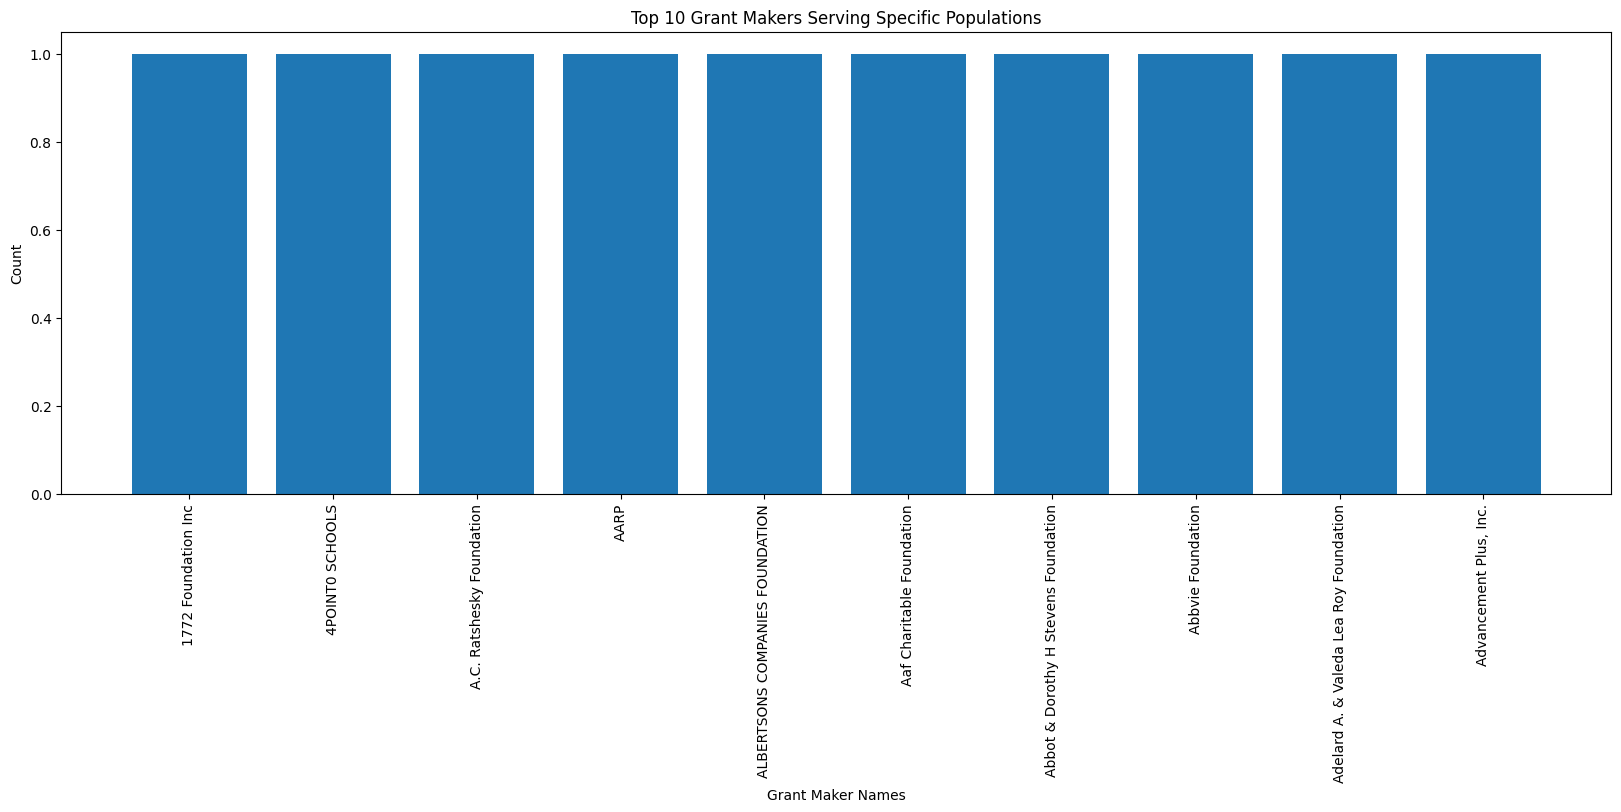

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
  
Grants = pd.read_csv('../../Data/Grants.csv', low_memory=False)

african_descent_code = 'PE030000'
latin_american_descent_code = 'PE050000'

# Nonprofits that have received grants and their locations
nonprofits_received_grants = Grants[['recip_name', 'recip_city', 'recip_state', 'recip_country']].drop_duplicates()
non_profit_counts = nonprofits_received_grants.groupby(['recip_name']).size().reset_index(name='count')
grants_geo_counts = nonprofits_received_grants.groupby(['recip_city', 'recip_state', 'recip_country']).size().reset_index(name='count')


# Recipients serving populations of African and Latin American descent
recipients_serving_specific_populations = Grants[
    (Grants['recip_subject_code'].str.contains(african_descent_code)) | 
    (Grants['recip_population_code'].str.contains(latin_american_descent_code)) |
    (Grants['recip_subject_code'].str.contains(latin_american_descent_code)) | 
    (Grants['recip_population_code'].str.contains(african_descent_code))
]

unique_recipients_serving_specific_populations = recipients_serving_specific_populations[['recip_name']].drop_duplicates()
unique_grantmaker_serving_specific_populations = recipients_serving_specific_populations[['gm_name']].drop_duplicates()

# Counts for recipients and grant makers
ALRecip_counts = unique_recipients_serving_specific_populations.groupby(['recip_name']).size().reset_index(name='count')
ALGrantMaker_counts = unique_grantmaker_serving_specific_populations.groupby(['gm_name']).size().reset_index(name='count')

# Select the top 10 rows for plotting
top_10_nonprofit = non_profit_counts.nlargest(10, 'count')
top_10_Geo = grants_geo_counts.nlargest(10, 'count')
top_10_ALRecip = ALRecip_counts.nlargest(10, 'count')
top_10_ALGrantMaker = ALGrantMaker_counts.nlargest(10, 'count')

#Plotting for non-profit
plt.figure(figsize=(20, 6))
plt.bar(range(len(top_10_nonprofit)), top_10_nonprofit['count'], tick_label=top_10_nonprofit['recip_name'])
plt.xticks(rotation=90)
plt.xlabel('Non-profit Names')
plt.ylabel('Count')
plt.title('Top 10 Recipients')
plt.show()

# Plotting for Geo
plt.figure(figsize=(20, 6))
plt.bar(range(len(top_10_Geo)), top_10_Geo['count'], tick_label=top_10_nonprofit.apply(lambda x: f"{x['recip_city']}, {x['recip_state']}, {x['recip_country']}", axis=1))
plt.xticks(rotation=90)
plt.xlabel('Unique Combinations')
plt.ylabel('Count')
plt.title('Top 10 Geographic Location that receives Grants')
plt.show()

# Plotting for recipients
plt.figure(figsize=(20, 6))
plt.bar(range(len(top_10_ALRecip)), top_10_ALRecip['count'], tick_label=top_10_ALRecip['recip_name'])
plt.xticks(rotation=90)
plt.xlabel('Recipient Names')
plt.ylabel('Count')
plt.title('Top 10 Recipients Serving Specific Populations')
plt.show()

# Plotting for grant makers
plt.figure(figsize=(20, 6))
plt.bar(range(len(top_10_ALGrantMaker)), top_10_ALGrantMaker['count'], tick_label=top_10_ALGrantMaker['gm_name'])
plt.xticks(rotation=90)
plt.xlabel('Grant Maker Names')
plt.ylabel('Count')
plt.title('Top 10 Grant Makers Serving Specific Populations')
plt.show()



**Kevin's Part**

**Questions:**
```
What are the total contributions (CONTRIB_ALL) and revenue (total_revenue) of all nonprofit organizations who have stated that their recipient subject code (pcs_population) corresponds to people of African descent and people of Latin American descent
```
    Most of revenue comes from organizations who have stated that their recipient subject code corresponds to peopel of African descent adn people of Latin American descent.

    As for the total contribution, we see a total of 341 organizations playing a role.
```


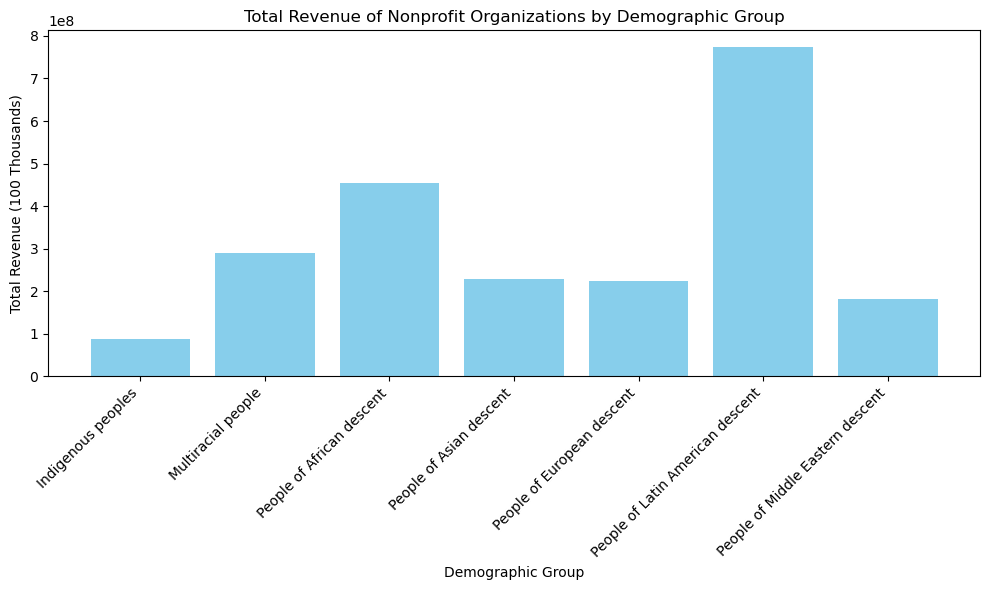

Total Revenue of nonprofit organizations for African and Latin American descent: 911907430.0
The number of total company contribution to the revenue is: 341
Number of unique company contributions to the revenue is: 129


In [7]:
import pandas as pd
import matplotlib.pyplot as plt  

base_bundle = pd.read_csv('data/Base_bundle.csv', low_memory=False)


# Step 1: Filter organizations with recipient subject codes for people of African and Latin American descent
filtered_nonProfit = base_bundle[base_bundle['pcs_population'].str.contains('PE030000|PE050000', na=False)]
row_count1 = filtered_nonProfit.shape[0]

# Remove duplicates based on the "organization_name" column
filtered_nonProfit_unique = filtered_nonProfit.drop_duplicates(subset='organization_name')

# Calculate the row count
row_count = filtered_nonProfit_unique.shape[0]
 
total_revenue = filtered_nonProfit['total_revenue'].sum()

# Define dictionary mapping demographic groups to their respective codes
population_codes = {
    'Indigenous peoples': 'PE060000',
    'Multiracial people': 'PE070000',
    'People of African descent': 'PE030000',
    'People of Asian descent': 'PE020000',
    'People of European descent': 'PE040000',
    'People of Latin American descent': 'PE050000',
    'People of Middle Eastern descent': 'PE010000'
}

# Step 1: Filter organizations based on recipient subject codes for each demographic group
total_revenues = {}
for group, code in population_codes.items():
    filtered_df = base_bundle[base_bundle['pcs_population'].str.contains(code, na=False)]
    total_revenues[group] = filtered_df['total_revenue'].sum()

# Step 2: Create a bar plot for the total revenue for each demographic group
plt.figure(figsize=(10, 6))
plt.bar(total_revenues.keys(), total_revenues.values(), color='skyblue')
plt.xlabel('Demographic Group')
plt.ylabel('Total Revenue (100 Thousands)')
plt.title('Total Revenue of Nonprofit Organizations by Demographic Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Display the results
print("Total Revenue of nonprofit organizations for African and Latin American descent:", total_revenue)

print("The number of total company contribution to the revenue is:", row_count1 )

print("Number of unique company contributions to the revenue is:", row_count)

**Charles's Part**

**Questions:**
```
1.What are the subject focus areas of the organizations who have stated that their recipient subject code (pcs_subject ) corresponds to people of African descent and people of Latin American descent?
```

```


C:\Users\Ludwig\AppData\Local\Temp\ipykernel_26776\425993100.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


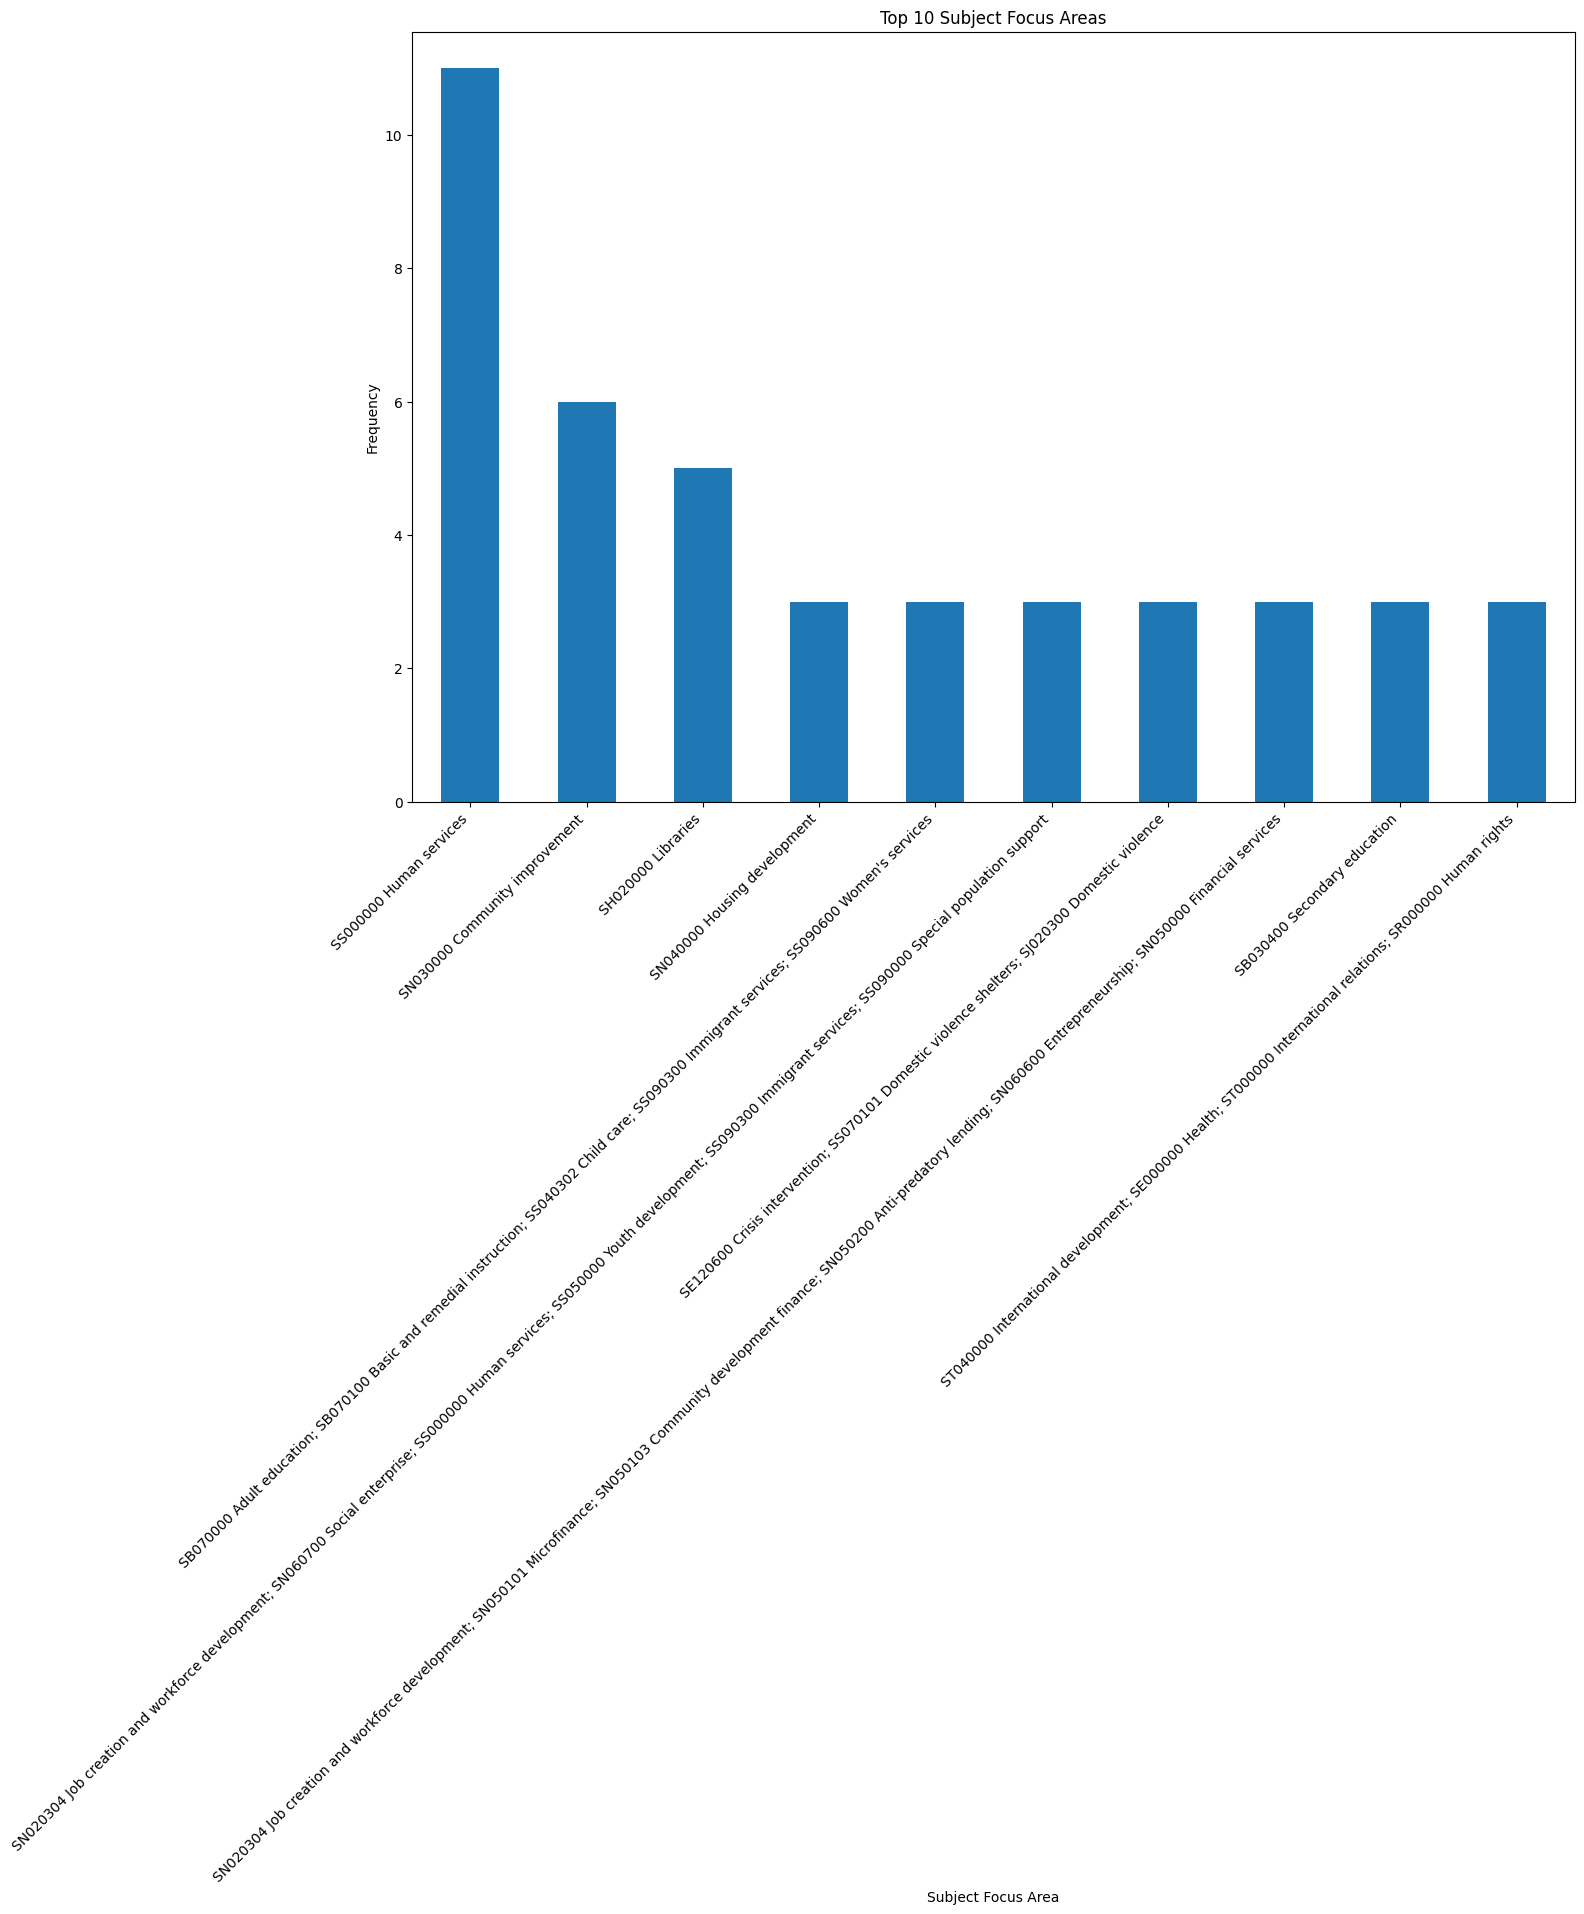

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#Read the CSV file into a DataFrame
df = pd.read_csv('../../Data/Base_bundle.csv', low_memory=False)

#Filter organizations corresponding to people of African descent and Latin American descent
filtered_df = df[df['pcs_population'].str.contains('PE030000|PE050000', na=False)]

#Extract and count unique subject focus areas
subject_focus_counts = filtered_df['pcs_subject'].value_counts().head(10)

#Create bar chart
plt.figure(figsize=(15, 10))
plt.tight_layout(rect=[0, 0, 1, 0.96])
subject_focus_counts.plot(kind='bar')
plt.title('Top 10 Subject Focus Areas')
plt.xlabel('Subject Focus Area')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Kalin's Part**

**Questions:**
```
1. What is the financial status (total_assets_eoy) and (total_revenue) of organizations whose stated recipient code is people of African and Latin American descent? (clarify status of the organization e.g. active or inactive (active_status))
```

```


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

base_bundle = pd.read_csv('data/Base_bundle.csv', low_memory=False)
filtered_data = base_bundle[base_bundle['pcs_population'].str.contains('PE030000|PE050000', na=False)]
organization_counts = filtered_data['active_status'].value_counts()

Number of Active Organizations: 124
Active Organization Names:


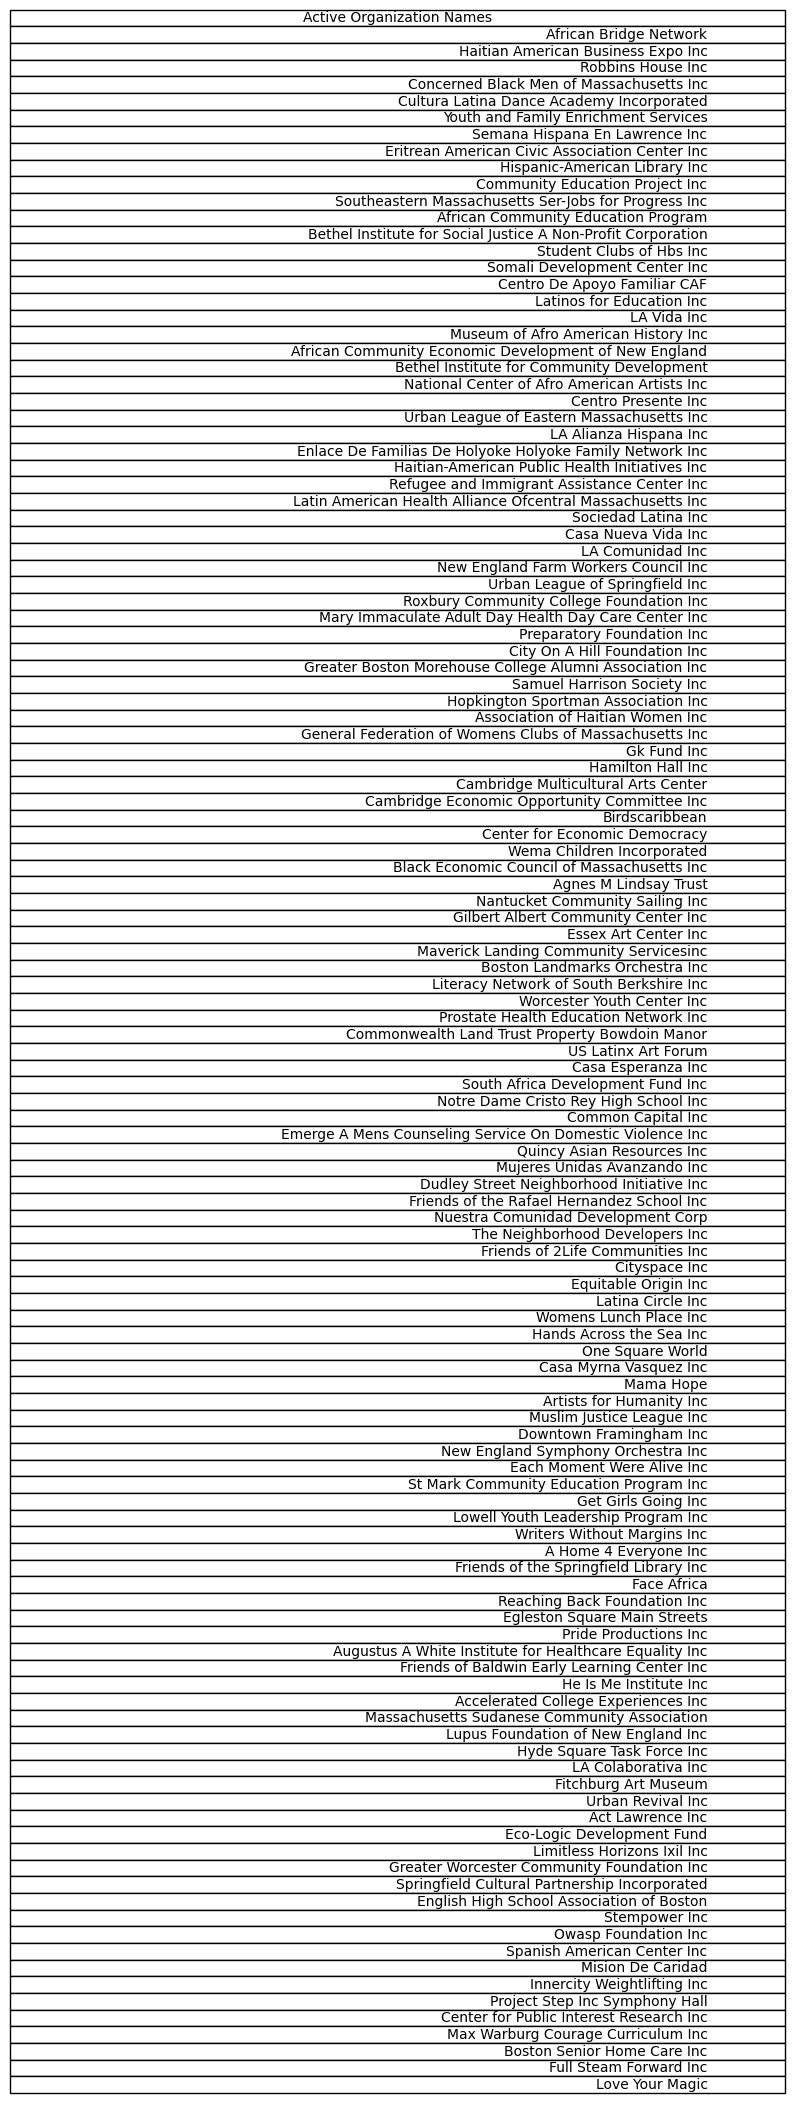

In [3]:
active_organizations = filtered_data[filtered_data['active_status'] == 'Active']['organization_name'].drop_duplicates()

# Get the updated count of active organizations
num_active_organizations = len(active_organizations)
print("Number of Active Organizations:", num_active_organizations)
print("Active Organization Names:")
  
# Plotting
plt.figure(figsize=(10, 6))
table_data = [[name] for name in active_organizations]
plt.table(cellText=table_data,
          colLabels=['Active Organization Names'],
          loc='center')
plt.axis('off')  # Turn off axis
plt.show()

Number of Active Organizations: 5

Inactive Organization Names:


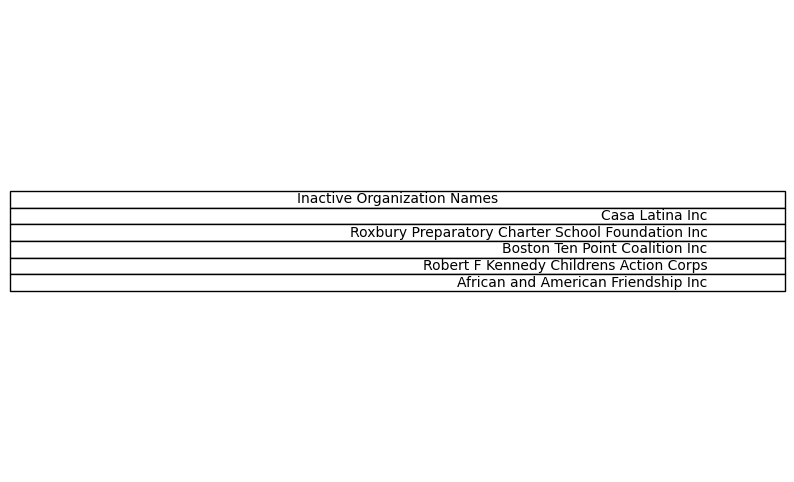

In [4]:
inactive_organizations = filtered_data[filtered_data['active_status'] == 'Inactive']['organization_name'].drop_duplicates()

# Get the updated count of active organizations
num_inactive_organizations = len(inactive_organizations)
print("Number of Active Organizations:", num_inactive_organizations)

print("\nInactive Organization Names:")
# Plotting
plt.figure(figsize=(10, 6))
table_data = [[name] for name in inactive_organizations]
plt.table(cellText=table_data,
          colLabels=['Inactive Organization Names'],
          loc='center')
plt.axis('off')  # Turn off axis
plt.show()

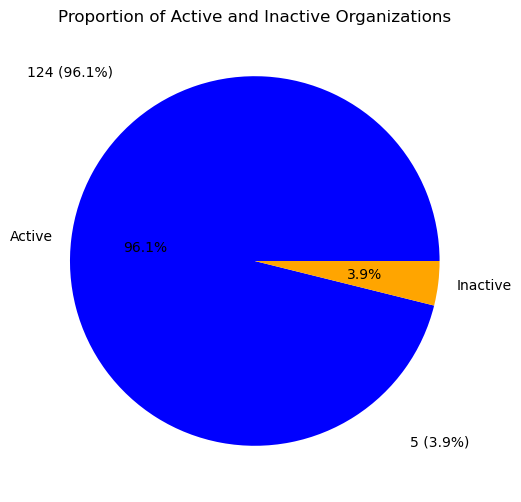

In [5]:
# Calculate percentages
total_organizations = num_active_organizations + num_inactive_organizations
active_percent = (num_active_organizations / total_organizations) * 100
inactive_percent = (num_inactive_organizations / total_organizations) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.pie([num_active_organizations, num_inactive_organizations], labels=['Active', 'Inactive'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.text(-1, 1, f"{num_active_organizations} ({active_percent:.1f}%)", ha='center')
plt.text(1, -1, f"{num_inactive_organizations} ({inactive_percent:.1f}%)", ha='center')
plt.title('Proportion of Active and Inactive Organizations')
plt.show()

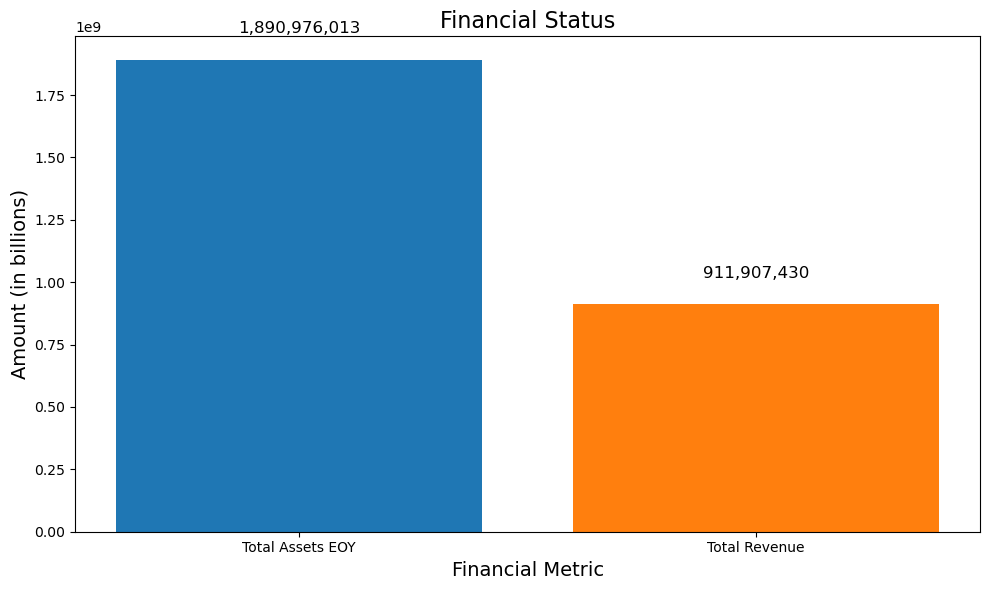

In [8]:
# Calculate financial status for filtered organizations
total_assets_eoy = filtered_data['total_assets_eoy'].sum()
total_revenue = filtered_data['total_revenue'].sum()

# Define the data
metrics = ['Total Assets EOY', 'Total Revenue']
values = [total_assets_eoy, total_revenue]

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e']

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=colors)

# Add text labels to the bars with commas for large numbers
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05 * max(values),
             f'{value:,.0f}', ha='center', va='bottom', fontsize=12, color='black')  # Displaying with commas

# Add titles and labels
plt.title('Financial Status', fontsize=16)
plt.ylabel('Amount (in billions)', fontsize=14)
plt.xlabel('Financial Metric', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()